In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pydataset import data
from datetime import date
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from env import get_db_url, user, password, host

# CORRELATION TEST 
### (PEARSON'S R)

#### Use the sleepstudy data. 

#### Is there a relationship between days and reaction time?¶


In [3]:
sleepstudy = data('sleepstudy')

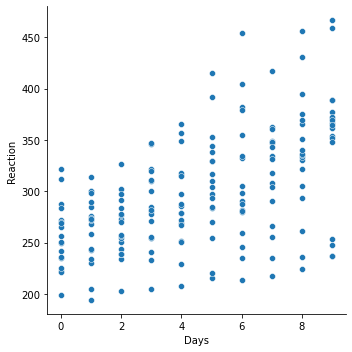

In [4]:
# STEP 2: visualize
sns.relplot(sleepstudy.Days, sleepstudy.Reaction)
plt.show()

In [5]:
# STEP 3: Establish hypotheses

# H0: There is no linear relationship between days and reaction time
# H1: There is a linear relationship between days and reaction time

In [8]:
# STEP 3: perform the test

alpha = .05

r, p = stats.pearsonr(sleepstudy.Days, sleepstudy.Reaction)
r, p

(0.5352302262650253, 9.894096322214812e-15)

In [9]:
# STEP 4: Evaluate, come to conclusion

if p < alpha:
    print('Reject H0')
else: 
    print('Fail to reject H0')

Reject H0


#### conclusions: 

Since p is less than alpha, we reject the null hypothesis that there is no linear correlation between the two variables.

Meaning: there is (probably) a linear correlation between the two variables. 

We come to this conclusion because, in a world where there ACTUALLY IS NO correlation, there is LESS THAN A 5% (alpha) chance that we would obtain a sample with a correlation AT LEAST AS STRONG as the one we tested here. 

# T-Test, 1-Sample, Two-Tailed

#### use the mpg data
#### is there a difference in city mpg between compact cars and city mpg for all the cars in the dataset?

In [24]:
# STEP 1: get the data
cars = data('mpg')
compact_cars = cars[cars['class'] == 'compact']
pop_mean = cars.cty.mean()

In [ ]:
# STEP 2: establish hypothesis

# H0: There is no difference between city mpg for compact cars
#     and city mpg for all cars in the dataset

# H1: There is a difference between city mpg for compact cars
#     and city mpg for all cars in the dataset

In [ ]:
# STEP 3: confirm the necesssary assumptions

# is the data approximately normally distributed?

In [19]:
# do we have enough data/samples?

print(len(cars))
print(len(compact_cars))

234
47


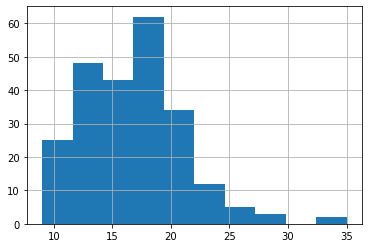

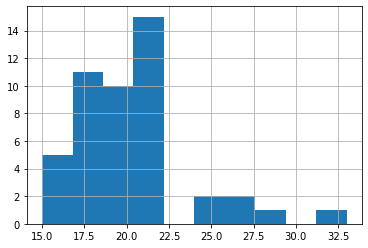

In [21]:
# what does the distribution look like?

cars.cty.hist()
plt.show()

compact_cars.cty.hist()
plt.show()

In [26]:
# STEP 4: conduct the test

alpha = .05

t, p = stats.ttest_1samp(compact_cars.cty,
                         pop_mean)
t, p

(6.6191042534408915, 3.4017448216394005e-08)

In [29]:
# STEP 5: evaluate, conclude

# two tailed test evaluation:

if p < alpha:
    print('Reject H0.')
else: 
    print('Fail to reject H0.')

Reject H0.


#### conclusions

Since p < alpha, we reject the null hypothesis that there is no difference between the city mpg for compact cars and the city mpg for all the cars in the dataset. 

This means that in a world where there ACTUALLY IS NO DIFFERENCE, there is less than a 5% chance that we would obtain a sample AT LEAST AS DIFFERENT from the population as the one we tested here. So, we conclude that there (probably) actually is a difference. 